In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
path = r"NLDAS_FORA0125_H.A20250928.1200.020.nc"
ds = xr.open_dataset(path)
ds




<xarray.Dataset> Size: 5MB
Dimensions:      (time: 1, bnds: 2, lat: 224, lon: 464)
Coordinates:
  * lon          (lon) float32 2kB -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * lat          (lat) float32 896B 25.06 25.19 25.31 ... 52.69 52.81 52.94
  * time         (time) datetime64[ns] 8B 2025-09-28T12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] 16B ...
    Tair         (time, lat, lon) float32 416kB ...
    Qair         (time, lat, lon) float32 416kB ...
    PSurf        (time, lat, lon) float32 416kB ...
    Wind_E       (time, lat, lon) float32 416kB ...
    Wind_N       (time, lat, lon) float32 416kB ...
    LWdown       (time, lat, lon) float32 416kB ...
    CRainf_frac  (time, lat, lon) float32 416kB ...
    CAPE         (time, lat, lon) float32 416kB ...
    PotEvap      (time, lat, lon) float32 416kB ...
    Rainf        (time, lat, lon) float32 416kB ...
    SWdown       (time, lat, lon) float32 416kB ...
Attributes: (12/17)
    missing_value:          -9999.0
    time_definition:        hourly
    shortname:              NLDAS_FORA0125_H_2.0
    title:                  NLDAS Primary Forcing Data L4 Hourly 0.125 x 0.12...
    version:                2.0
    institution:            NASA GSFC
    ...                     ...
    websites:               https://ldas.gsfc.nasa.gov/nldas/ ; https://lis.g...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

# data set
- it's 4d array .
-  think of each variable (column like Tair  'it's the air tempreture near a surface' )
point to another four one dimenssion array ( time , lat , long ,bands)
- bands tell the begaining and ending of our one time step (which TEMPO data is houtly data )
- it's stack of spread sheets
- our data is **array-oriented scientific data** , so **netcdf** library deals with this kind (multidimensional array)

#* Summary of each varible and which one is more important for our AirRx project ---> air quality

## * related to the documentation of NLDAS data :
###- time_bnds :
- start/end timestamps for each time record (boundary of the time interval).
- tells you the accumulation window ( hourly sum )
- we will Use in an app to display exact valid period when you show a danger (e.g., “rainfall accumulated between 12:00–13:00”)

###- Tair :
-  near-surface air temperature (usually 2 m above ground).
- Typical units: Kelvin (K) in NLDAS netCDF — sometimes °C in other files
- must always check the units attribute of each variable
- we can use on  heat-vulnerability maps, cooling-center placement, heat-health alert.

###- Qair :
- near-surface specific wetness (mass of water steam per mass of air).
- relative wetness (with Tair & PSurf), wet bulb temperature.
- we can use on  heat-stress advisory (together with Tair), fog/mist prediction, agricultural irrigation planning.

###- PSurf :
- surface air pressure (pressure at the surface), measured by  pascals (Pa) or hPa "hectopascal" used in meteorology  .
- we can use it to  estimate storm intensity.

### -Wind_E and Wind_N :
- wind_E --> how much the wind is blowing towards the east  "eastward" .
- Wind_N ---> how much the wind is blowing towards the north "northword"
- usually at 10 m .
- Wind_E > 0 → wind is blowing east , Wind_E < 0 → wind is blowing west , Wind_N > 0 → wind blows north , and  Wind_N < 0 → wind blows south
- we can use it to calculate  wind speed = sqrt(E²+N²), wind direction = arctan2(E,N).
- Actionable insights : fire-spread risk (wind speed/direction), storm/wind damage alerts, dispersion of pollutants (air quality insightes ), marine/transport warnings.

###- LWdown :
- downward longwave (thermal) radiation at the surface (from atmosphere to ground).
- ued on  energy-balance and surface temperature modeling, night-time urban heat analysis.

###- CRainf_frac :
- fraction of total rainfall that is convective --> how much of the rainfall was produced by convective processes vs stratiform (spread horizontally rather than growing vertically, a result of stable atmospheric conditions and non-convective air lifting).
- Typical units: fraction between 0 and 1.
-we can use to  identify short, intense convective storms (flash flood risk), prioritize alerts in urban drainage hotspots (convective storms often cause flash floods).

###- CAPE :
- Convective Available Potential Energy ---> a measure of atmospheric instability and the potential for strong updrafts/storms.
Typical units: J kg⁻¹. High CAPE → greater potential for severe convection (thunderstorms, large hail).
- we can use it on  flag severe-weather risk zones, trigger “watch for thunderstorms” messaging, combine with wind & rainfall for storm-severity scoring.

###- PotEvap :
- potential evaporation --> amount of water that would evaporate if unlimited water were available.
- can be used on  drought/agricultural stress indicators, irrigation scheduling suggestions, water-resource alerts(not needed in air quality and health advice).

###-Rainf :
- total rainfall accumulated for the time interval (rain + water equivalent of snow where applicable).
- can be used on  flood / flash-flood alerts, road-closure warnings, flash-flood probability maps.

###- SWdown :
- downward shortwave (solar) radiation at the surface (incoming solar irradiance).
- used on : solar energy forecasts, daytime heat exposure alerts, evapotranspiration estimation, wildfire ignition/risk modeling (available energy).

In [ ]:
df = ds.to_dataframe().reset_index()
df


,time,bnds,lat,lon,time_bnds,Tair,Qair,PSurf,Wind_E,Wind_N,LWdown,CRainf_frac,CAPE,PotEvap,Rainf,SWdown
0,2025-09-28 12:00:00,0,25.0625,-124.9375,2025-09-28 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-09-28 12:00:00,0,25.0625,-124.8125,2025-09-28 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-09-28 12:00:00,0,25.0625,-124.6875,2025-09-28 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-09-28 12:00:00,0,25.0625,-124.5625,2025-09-28 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-09-28 12:00:00,0,25.0625,-124.4375,2025-09-28 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207867,2025-09-28 12:00:00,1,52.9375,-67.5625,2025-09-28 12:00:00,279.470001,0.005761,93522.203125,-0.37,4.93,327.660004,0.0,0.47,0.0171,0.0399,116.013000
207868,2025-09-28 12:00:00,1,52.9375,-67.4375,2025-09-28 12:00:00,279.459991,0.005745,93429.000000,-0.62,4.52,325.089996,0.0,1.51,0.0176,0.0354,142.324997
207869,2025-09-28 12:00:00,1,52.9375,-67.3125,2025-09-28 12:00:00,279.500000,0.005750,93438.703125,-0.89,4.09,322.649994,0.0,3.13,0.0181,0.0323,150.847000
207870,2025-09-28 12:00:00,1,52.9375,-67.1875,2025-09-28 12:00:00,279.579987,0.005775,93542.500000,-1.17,3.66,320.299988,0.0,5.33,0.0185,0.0307,151.307999


In [ ]:
vars = ['lon','lat','time','time_bnds','Tair','Qair','PSurf','Wind_E','Wind_N','LWdown']

# print meta data of each one
for v in vars:
    if v in ds:
        da = ds[v]
        print(f"---{v}---")
        print("dims:", da.dims)
        print("shape:", da.shape)
        print("dtype:", da.dtype)
        # print first few attributes (units, long_name if present)
        for k in ('units','long_name','standard_name'):
            if k in da.attrs:
                print(f" {k}: {da.attrs[k]}")
    else:
        print(f"\n--- {v} not found in dataset ---")


---lon---
dims: ('lon',)
shape: (464,)
dtype: float32
 units: degrees_east
 long_name: longitude
 standard_name: longitude
---lat---
dims: ('lat',)
shape: (224,)
dtype: float32
 units: degrees_north
 long_name: latitude
 standard_name: latitude
---time---
dims: ('time',)
shape: (1,)
dtype: datetime64[ns]
 long_name: time
---time_bnds---
dims: ('time', 'bnds')
shape: (1, 2)
dtype: datetime64[ns]
---Tair---
dims: ('time', 'lat', 'lon')
shape: (1, 224, 464)
dtype: float32
 units: K
 long_name: 2-meter above ground Temperature
 standard_name: Near surface air temperature
---Qair---
dims: ('time', 'lat', 'lon')
shape: (1, 224, 464)
dtype: float32
 units: kg kg-1
 long_name: 2-meter above ground Specific humidity
 standard_name: Near surface specific humidity
---PSurf---
dims: ('time', 'lat', 'lon')
shape: (1, 224, 464)
dtype: float32
 units: Pa
 long_name: Surface pressure
 standard_name: Surface pressure
---Wind_E---
dims: ('time', 'lat', 'lon')
shape: (1, 224, 464)
dtype: float32
 units: 

In [ ]:
print("lon:", float(ds.lon.min()), "->", float(ds.lon.max()))
print("lat:", float(ds.lat.min()), "->", float(ds.lat.max()))
print("time start ---> end:", ds.time.min().values, "--->", ds.time.max().values)


lon: -124.9375 -> -67.0625
lat: 25.0625 -> 52.9375
time start ---> end: 2025-09-28T12:00:00.000000000 ---> 2025-09-28T12:00:00.000000000


In [ ]:
!pip install netCDF4
from netCDF4 import Dataset

ds = Dataset("NLDAS_FORA0125_H.A20250928.1200.020.nc")
print(ds.variables.keys())   # list of variables
temp = ds.variables["Tair"]  # access temperature variable


dict_keys(['lon', 'lat', 'time', 'time_bnds', 'Tair', 'Qair', 'PSurf', 'Wind_E', 'Wind_N', 'LWdown', 'CRainf_frac', 'CAPE', 'PotEvap', 'Rainf', 'SWdown'])


In [ ]:
temp ## CHANGE THE ["Tair"] and check each meta data of each variable


<class 'netCDF4.Variable'>
float32 Tair(time, lat, lon)
    units: K
    standard_name: Near surface air temperature
    long_name: 2-meter above ground Temperature
    cell_methods: time: point
    scale_factor: 1.0
    add_offset: 0.0
    missing_value: -9999.0
    _FillValue: -9999.0
    vmin: 270.52
    vmax: 303.31
unlimited dimensions: 
current shape = (1, 224, 464)
filling off

In [ ]:
ds = xr.open_dataset(path)

In [ ]:
# small sample of Tair: first 3 times, first 5 lats, first 5 lons
print(ds.isel(time=slice(0,3), lat=slice(0,5), lon=slice(0,5)).values)


<bound method Mapping.values of <xarray.Dataset> Size: 1kB
Dimensions:      (time: 1, bnds: 2, lat: 5, lon: 5)
Coordinates:
  * lon          (lon) float32 20B -124.9 -124.8 -124.7 -124.6 -124.4
  * lat          (lat) float32 20B 25.06 25.19 25.31 25.44 25.56
  * time         (time) datetime64[ns] 8B 2025-09-28T12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] 16B ...
    Tair         (time, lat, lon) float32 100B ...
    Qair         (time, lat, lon) float32 100B ...
    PSurf        (time, lat, lon) float32 100B ...
    Wind_E       (time, lat, lon) float32 100B ...
    Wind_N       (time, lat, lon) float32 100B ...
    LWdown       (time, lat, lon) float32 100B ...
    CRainf_frac  (time, lat, lon) float32 100B ...
    CAPE         (time, lat, lon) float32 100B ...
    PotEvap      (time, lat, lon) float32 100B ...
    Rainf        (time, lat, lon) float32 100B ...
    SWdown       (time, lat, lon) float32 100B ...
Attributes: 

In [ ]:
# small sample of Tair: first 3 times, first 5 lats, first 5 lons
print(ds.isel(time=slice(0,3), lat=slice(0,5), lon=slice(0,5)).values)


<bound method Mapping.values of <xarray.Dataset> Size: 1kB
Dimensions:      (time: 1, bnds: 2, lat: 5, lon: 5)
Coordinates:
  * lon          (lon) float32 20B -124.9 -124.8 -124.7 -124.6 -124.4
  * lat          (lat) float32 20B 25.06 25.19 25.31 25.44 25.56
  * time         (time) datetime64[ns] 8B 2025-09-28T12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] 16B ...
    Tair         (time, lat, lon) float32 100B ...
    Qair         (time, lat, lon) float32 100B ...
    PSurf        (time, lat, lon) float32 100B ...
    Wind_E       (time, lat, lon) float32 100B ...
    Wind_N       (time, lat, lon) float32 100B ...
    LWdown       (time, lat, lon) float32 100B ...
    CRainf_frac  (time, lat, lon) float32 100B ...
    CAPE         (time, lat, lon) float32 100B ...
    PotEvap      (time, lat, lon) float32 100B ...
    Rainf        (time, lat, lon) float32 100B ...
    SWdown       (time, lat, lon) float32 100B ...
Attributes: 

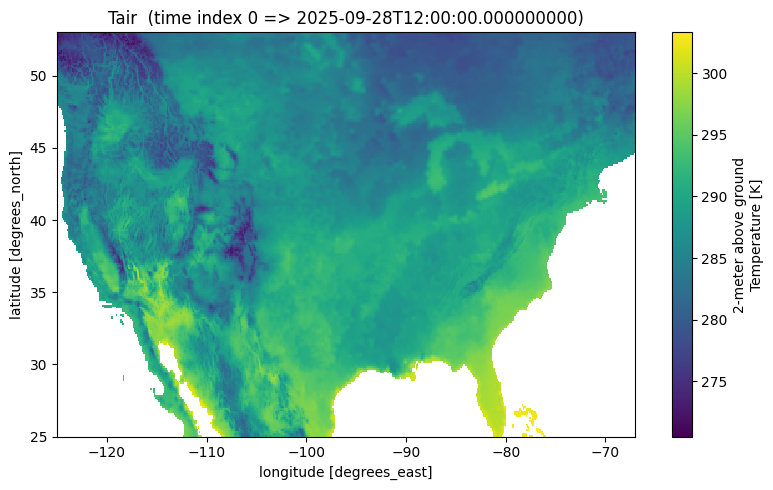

In [ ]:
tidx = 0
da = ds['Tair'].isel(time=tidx)
plt.figure(figsize=(8,5))
im = da.plot.pcolormesh(x='lon', y='lat', add_colorbar=True)
plt.title(f"Tair  (time index {tidx} => {ds.time[tidx].values})")
plt.tight_layout()
plt.show()


In [ ]:
# discribtiv statics for some variables
for v in ['Tair','Qair','PSurf','LWdown']:
    if v in ds:
        da = ds[v]
        print(f"\n{v}: min {float(da.min()):.4g}, max {float(da.max()):.4g}, mean {float(da.mean()):.4g}")



Tair: min 270.5, max 303.3, mean 287.4

Qair: min 0.002634, max 0.02111, mean 0.007998

PSurf: min 6.543e+04, max 1.019e+05, mean 9.357e+04

LWdown: min 207, max 459.3, mean 313.3


In [ ]:
lon0 = float(ds.lon.mean()); lat0 = float(ds.lat.mean())
ts = ds['Tair'] # take care!!! , it wii be very huge , NLDAS has millions of records
df = ts.to_dataframe().reset_index()
df.to_csv(r"tair_timeseries.csv", index=False)
print("Saved:", r"tair_timeseries.csv")


Saved: tair_timeseries.csv


In [ ]:
print("Tair dims:", ds['Tair'].dims)


Tair dims: ('time', 'lat', 'lon')


In [ ]:
ds['Tair'] = ds['Tair'].transpose('time','lat','lon')
